In [26]:
# Import required libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Add src to path
sys.path.append('..')

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Load Dataset

In [ ]:
# Define paths
data_dir = '/content/drive/MyDrive/WOA7015 Advanced Machine Learning/data/'  # Parent directory
train_csv = os.path.join(data_dir, 'trainrenamed.csv')
test_csv = os.path.join(data_dir, 'testrenamed.csv')
answers_file = os.path.join(data_dir, 'answers.txt')
image_dir = os.path.join(data_dir, 'train')

# Load data
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

# Load answers vocabulary
with open(answers_file, 'r', encoding='utf-8') as f:
    answer_vocab = [line.strip() for line in f.readlines()]

print(f"Training samples: {len(train_df):,}")
print(f"Test samples: {len(test_df):,}")
print(f"Total samples: {len(train_df) + len(test_df):,}")
print(f"\nAnswer vocabulary size: {len(answer_vocab):,}")

Training samples: 19,755
Test samples: 6,761
Total samples: 26,516

Answer vocabulary size: 4,592


In [ ]:
# Display first few rows
print("\n=== Training Data Sample ===")
train_df.head(10)


=== Training Data Sample ===


,image,question,answer
0,image1,What is the appearance of the chromatin textur...,a salt-and-pepper pattern
1,image1,"Does the chromatin texture, with fine and coa...",yes
2,image1,Do neutrophils assume a salt-and-pepper pattern?,no
3,image1,Does granulomatous host response show the blan...,no
4,image1,Does high magnification show the bland cytolog...,yes
5,image1,What does high magnification show?,the bland cytology that typifies neuroendocrin...
6,image1,What shows the bland cytology that typifies ne...,high magnification
7,image1,Do the cytologic features of cis form a submuc...,no
8,image1,What do carcinoid tumors form?,a submucosal nodule
9,image1,What form a submucosal nodule composed of tumo...,carcinoid tumors


In [ ]:
# Check for missing values
print("\n=== Missing Values ===")
print("\nTraining set:")
print(train_df.isnull().sum())
print("\nTest set:")
print(test_df.isnull().sum())


=== Missing Values ===

Training set:
image       0
question    0
answer      0
dtype: int64

Test set:
image       0
question    0
answer      0
dtype: int64


## 2. Dataset Statistics

In [ ]:
# Count unique images
train_images = train_df['image'].nunique()
test_images = test_df['image'].nunique()

# Questions per image
train_qa_per_image = len(train_df) / train_images
test_qa_per_image = len(test_df) / test_images

print("=== Dataset Statistics ===")
print(f"\nTraining:")
print(f"  Images: {train_images:,}")
print(f"  Q&A pairs: {len(train_df):,}")
print(f"  Avg Q&A per image: {train_qa_per_image:.2f}")

print(f"\nTest:")
print(f"  Images: {test_images:,}")
print(f"  Q&A pairs: {len(test_df):,}")
print(f"  Avg Q&A per image: {test_qa_per_image:.2f}")

print(f"\nTotal unique images: {train_images + test_images:,}")

=== Dataset Statistics ===

Training:
  Images: 2,599
  Q&A pairs: 19,755
  Avg Q&A per image: 7.60

Test:
  Images: 858
  Q&A pairs: 6,761
  Avg Q&A per image: 7.88

Total unique images: 3,457


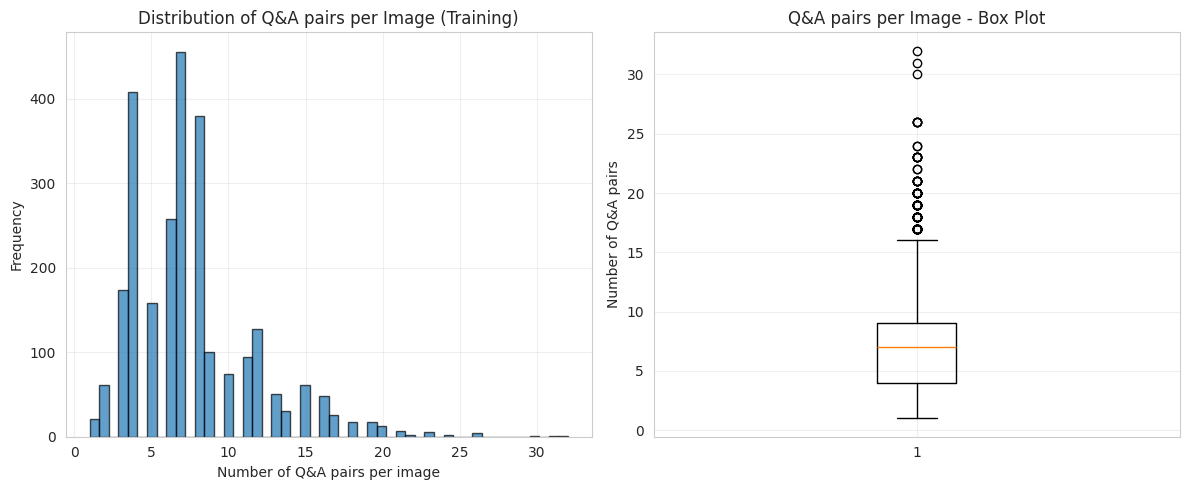

Min Q&A per image: 1
Max Q&A per image: 32
Median Q&A per image: 7


In [ ]:
# Distribution of Q&A pairs per image
train_qa_counts = train_df['image'].value_counts()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(train_qa_counts.values, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Number of Q&A pairs per image')
plt.ylabel('Frequency')
plt.title('Distribution of Q&A pairs per Image (Training)')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(train_qa_counts.values, vert=True)
plt.ylabel('Number of Q&A pairs')
plt.title('Q&A pairs per Image - Box Plot')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/WOA7015 Advanced Machine Learning/results/figures/qa_per_image_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Min Q&A per image: {train_qa_counts.min()}")
print(f"Max Q&A per image: {train_qa_counts.max()}")
print(f"Median Q&A per image: {train_qa_counts.median():.0f}")

## 3. Question Analysis

In [ ]:
# Question length statistics
train_df['question_length'] = train_df['question'].str.split().str.len()
test_df['question_length'] = test_df['question'].str.split().str.len()

print("=== Question Length Statistics ===")
print(f"\nTraining:")
print(train_df['question_length'].describe())
print(f"\nTest:")
print(test_df['question_length'].describe())

=== Question Length Statistics ===

Training:
count    19755.000000
mean         6.351506
std          4.487353
min          2.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         37.000000
Name: question_length, dtype: float64

Test:
count    6761.000000
mean        6.333974
std         4.448686
min         2.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        42.000000
Name: question_length, dtype: float64


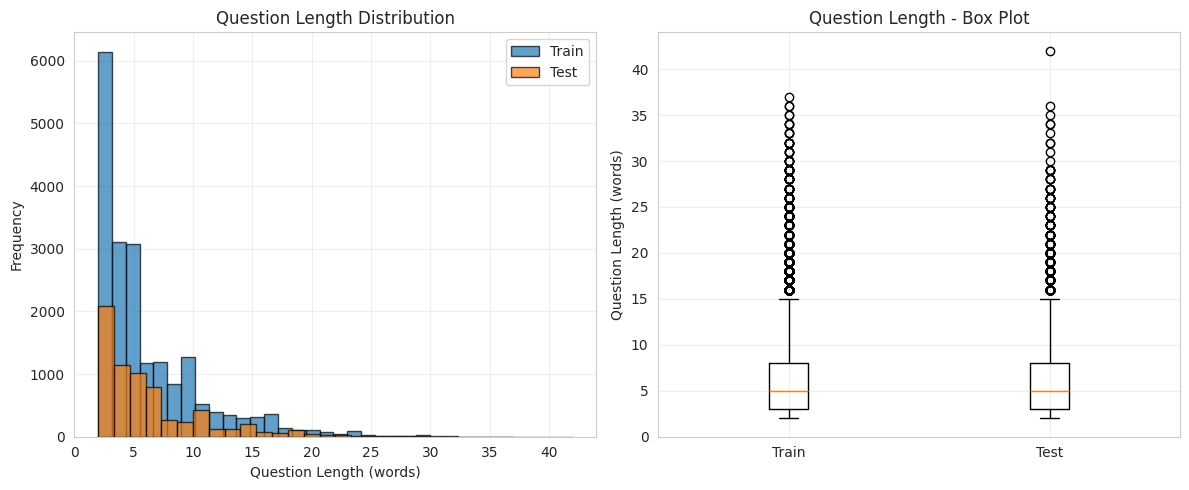

In [ ]:
# Plot question length distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(train_df['question_length'], bins=30, alpha=0.7, label='Train', edgecolor='black')
plt.hist(test_df['question_length'], bins=30, alpha=0.7, label='Test', edgecolor='black')
plt.xlabel('Question Length (words)')
plt.ylabel('Frequency')
plt.title('Question Length Distribution')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot([train_df['question_length'], test_df['question_length']],
            labels=['Train', 'Test'])
plt.ylabel('Question Length (words)')
plt.title('Question Length - Box Plot')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/WOA7015 Advanced Machine Learning/results/figures/question_length_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Question type analysis (based on starting words)
def get_question_type(question):
    question_lower = question.lower().strip()
    if question_lower.startswith('what'):
        return 'What'
    elif question_lower.startswith('is') or question_lower.startswith('are'):
        return 'Yes/No'
    elif question_lower.startswith('does') or question_lower.startswith('do'):
        return 'Yes/No'
    elif question_lower.startswith('where'):
        return 'Where'
    elif question_lower.startswith('how'):
        return 'How'
    elif question_lower.startswith('which'):
        return 'Which'
    elif question_lower.startswith('why'):
        return 'Why'
    else:
        return 'Other'

train_df['question_type'] = train_df['question'].apply(get_question_type)
test_df['question_type'] = test_df['question'].apply(get_question_type)

# Count question types
train_qtype_counts = train_df['question_type'].value_counts()
test_qtype_counts = test_df['question_type'].value_counts()

print("=== Question Types ===")
print("\nTraining:")
print(train_qtype_counts)
print(f"\nPercentages:")
print(train_qtype_counts / len(train_df) * 100)

=== Question Types ===

Training:
question_type
Yes/No    9718
What      8083
Where     1316
How        428
Other      139
Why         71
Name: count, dtype: int64

Percentages:
question_type
Yes/No    49.192609
What      40.916224
Where      6.661605
How        2.166540
Other      0.703619
Why        0.359403
Name: count, dtype: float64


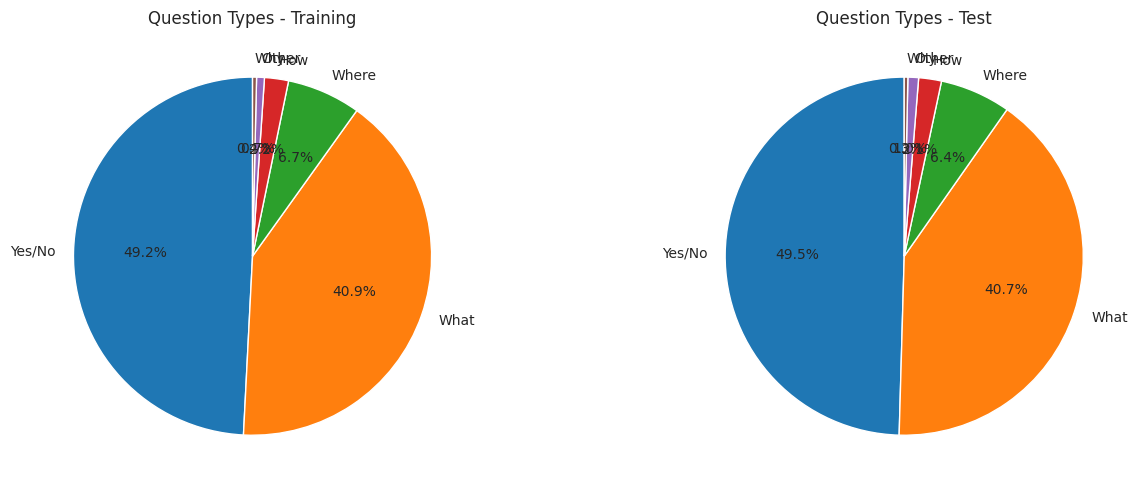

In [ ]:
# Plot question types
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training
axes[0].pie(train_qtype_counts.values, labels=train_qtype_counts.index,
           autopct='%1.1f%%', startangle=90)
axes[0].set_title('Question Types - Training')

# Test
axes[1].pie(test_qtype_counts.values, labels=test_qtype_counts.index,
           autopct='%1.1f%%', startangle=90)
axes[1].set_title('Question Types - Test')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/WOA7015 Advanced Machine Learning/results/figures/question_types.png', dpi=300, bbox_inches='tight')
plt.show()

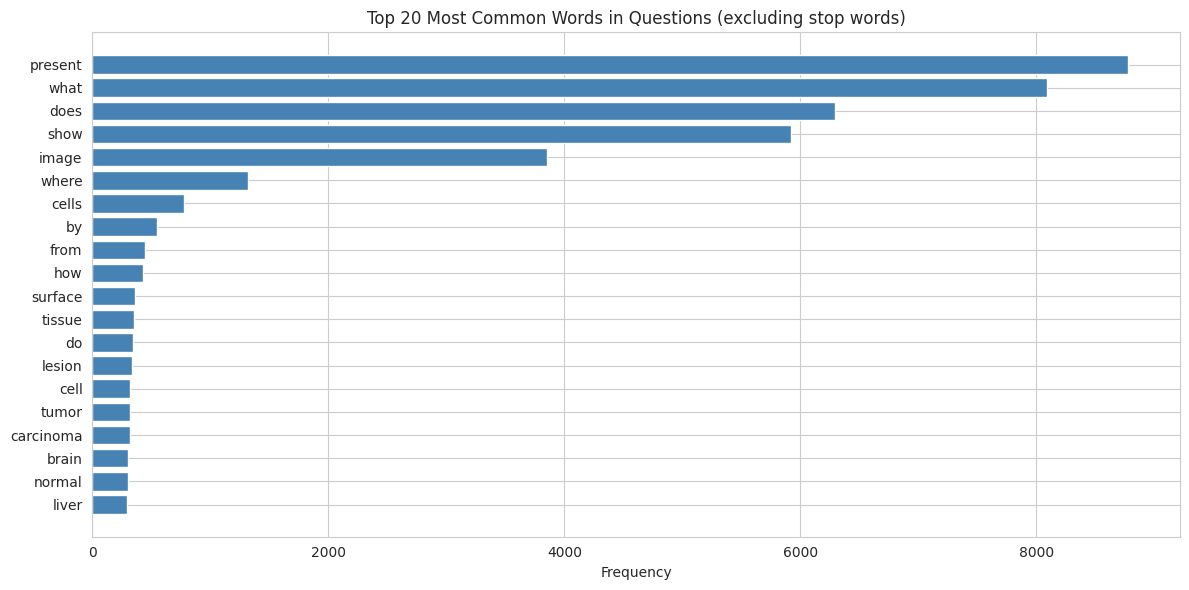

In [ ]:
# Most common question words
from collections import Counter
import re

# Tokenize all questions
all_questions = ' '.join(train_df['question'].values).lower()
words = re.findall(r'\b\w+\b', all_questions)
word_counts = Counter(words)

# Remove common stop words
stop_words = {'the', 'a', 'an', 'is', 'are', 'of', 'in', 'to', 'and', 'or', 'with', 'this', 'that'}
filtered_words = {word: count for word, count in word_counts.items() if word not in stop_words}

# Top 20 words
top_words = Counter(filtered_words).most_common(20)
words, counts = zip(*top_words)

plt.figure(figsize=(12, 6))
plt.barh(range(len(words)), counts, color='steelblue')
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency')
plt.title('Top 20 Most Common Words in Questions (excluding stop words)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/WOA7015 Advanced Machine Learning/results/figures/common_question_words.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Answer Analysis

In [ ]:
# Answer statistics
train_unique_answers = train_df['answer'].nunique()
test_unique_answers = test_df['answer'].nunique()

print("=== Answer Statistics ===")
print(f"\nTraining unique answers: {train_unique_answers:,}")
print(f"Test unique answers: {test_unique_answers:,}")
print(f"Total unique answers in vocab: {len(answer_vocab):,}")

# Answer length
train_df['answer_length'] = train_df['answer'].str.split().str.len()
test_df['answer_length'] = test_df['answer'].str.split().str.len()

print("\n=== Answer Length Statistics ===")
print("\nTraining:")
print(train_df['answer_length'].describe())
print("\nTest:")
print(test_df['answer_length'].describe())

=== Answer Statistics ===

Training unique answers: 3,273
Test unique answers: 1,318
Total unique answers in vocab: 4,592

=== Answer Length Statistics ===

Training:
count    19755.000000
mean         1.798178
std          2.250357
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         34.000000
Name: answer_length, dtype: float64

Test:
count    6761.000000
mean        1.762905
std         2.106237
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        27.000000
Name: answer_length, dtype: float64


In [ ]:
# Identify yes/no questions
train_yes_no = train_df[train_df['answer'].isin(['yes', 'no'])]
train_open_ended = train_df[~train_df['answer'].isin(['yes', 'no'])]

print(f"=== Closed vs Open-Ended Questions ===")
print(f"\nClosed-ended (yes/no): {len(train_yes_no):,} ({len(train_yes_no)/len(train_df)*100:.1f}%)")
print(f"Open-ended: {len(train_open_ended):,} ({len(train_open_ended)/len(train_df)*100:.1f}%)")

# Distribution of yes/no
print("\nYes/No distribution:")
print(train_df[train_df['answer'].isin(['yes', 'no'])]['answer'].value_counts())

=== Closed vs Open-Ended Questions ===

Closed-ended (yes/no): 9,806 (49.6%)
Open-ended: 9,949 (50.4%)

Yes/No distribution:
answer
yes    5428
no     4378
Name: count, dtype: int64


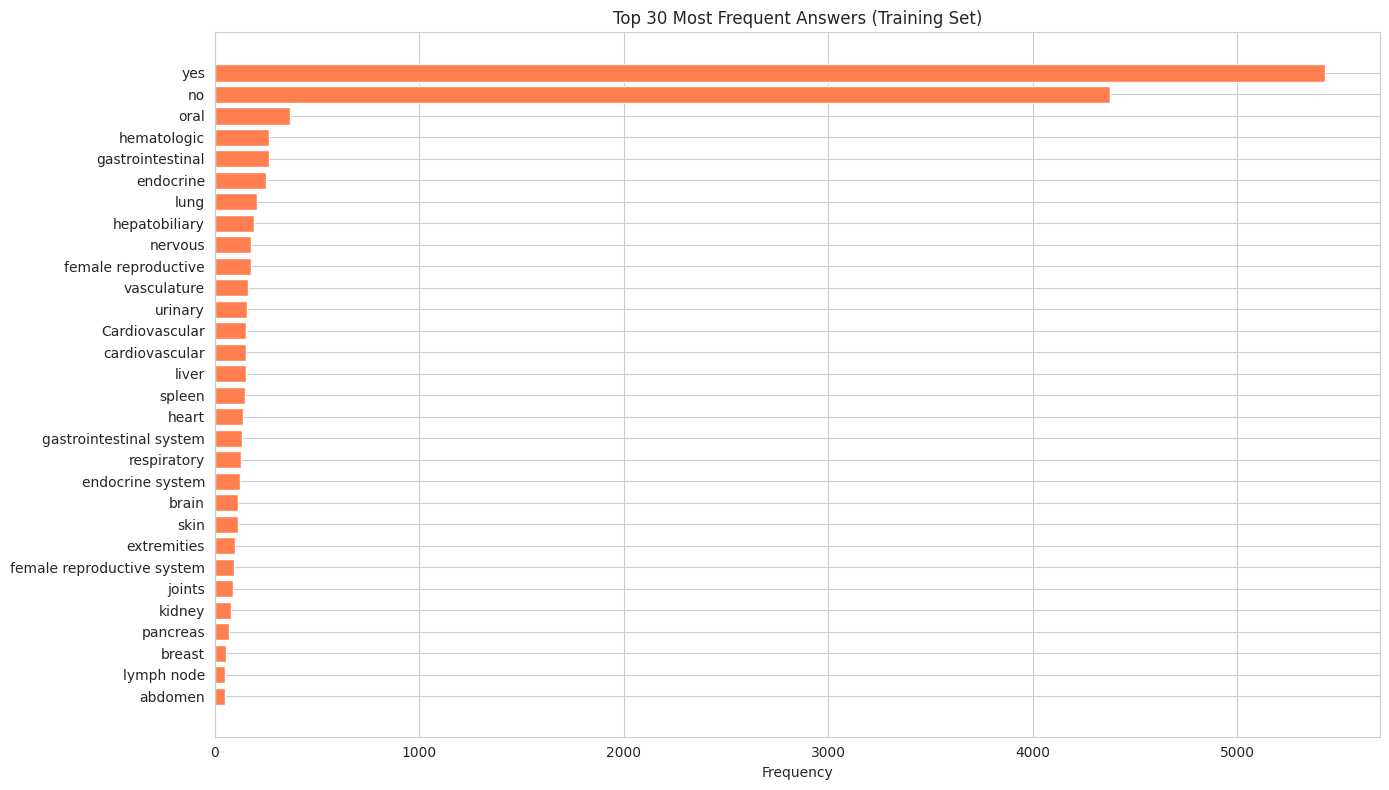


Top 10 answers:
answer
yes                    5428
no                     4378
oral                    370
hematologic             266
gastrointestinal        264
endocrine               250
lung                    208
hepatobiliary           193
nervous                 178
female reproductive     176
Name: count, dtype: int64


In [ ]:
# Top 30 most common answers
top_answers = train_df['answer'].value_counts().head(30)

plt.figure(figsize=(14, 8))
plt.barh(range(len(top_answers)), top_answers.values, color='coral')
plt.yticks(range(len(top_answers)), top_answers.index, fontsize=10)
plt.xlabel('Frequency')
plt.title('Top 30 Most Frequent Answers (Training Set)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/WOA7015 Advanced Machine Learning/results/figures/top_answers.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTop 10 answers:")
print(top_answers.head(10))

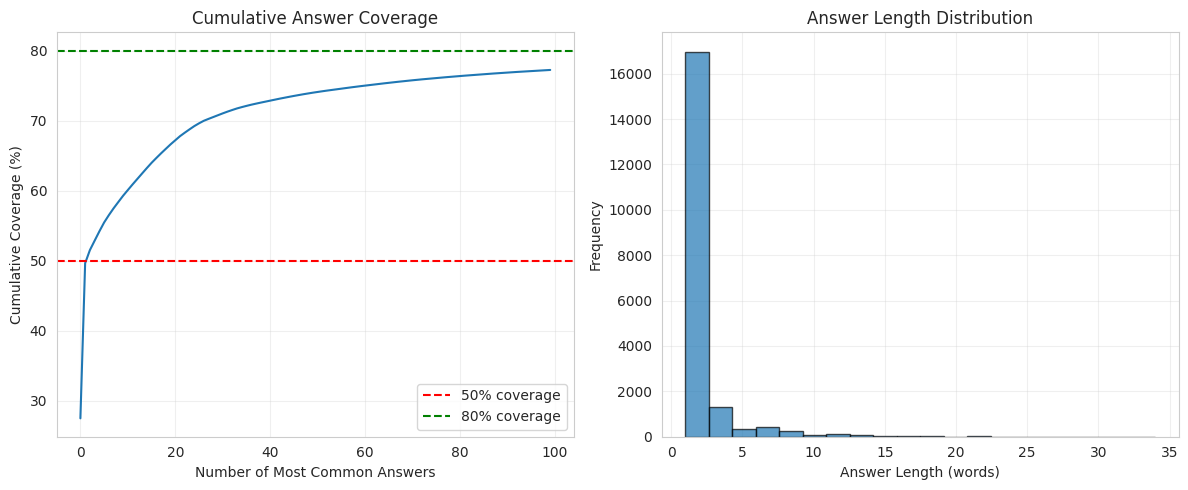


Top 2 answers cover 50% of the data
Top 187 answers cover 80% of the data


In [ ]:
# Answer distribution - cumulative
answer_counts = train_df['answer'].value_counts()
cumulative_coverage = np.cumsum(answer_counts.values) / len(train_df) * 100

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cumulative_coverage[:100])
plt.xlabel('Number of Most Common Answers')
plt.ylabel('Cumulative Coverage (%)')
plt.title('Cumulative Answer Coverage')
plt.grid(alpha=0.3)
plt.axhline(y=50, color='r', linestyle='--', label='50% coverage')
plt.axhline(y=80, color='g', linestyle='--', label='80% coverage')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(train_df['answer_length'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Answer Length (words)')
plt.ylabel('Frequency')
plt.title('Answer Length Distribution')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/WOA7015 Advanced Machine Learning/results/figures/answer_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Find how many answers cover 50% and 80% of data
idx_50 = np.argmax(cumulative_coverage >= 50)
idx_80 = np.argmax(cumulative_coverage >= 80)
print(f"\nTop {idx_50} answers cover 50% of the data")
print(f"Top {idx_80} answers cover 80% of the data")

## 5. Image Analysis

In [ ]:
# Sample random images and analyze their properties
sample_images = train_df['image'].unique()[:100]  # Sample 100 images

image_sizes = []
image_aspects = []
image_channels = []

for img_name in sample_images:
    img_path = os.path.join(image_dir, f"{img_name}.png" if not img_name.endswith('.png') else img_name)
    if os.path.exists(img_path):
        try:
            img = Image.open(img_path)
            width, height = img.size
            image_sizes.append((width, height))
            image_aspects.append(width / height)
            image_channels.append(len(img.getbands()))
        except Exception as e:
            print(f"Error loading {img_name}: {e}")

widths, heights = zip(*image_sizes)

print("=== Image Statistics (sample of 100) ===")
print(f"\nWidth - Min: {min(widths)}, Max: {max(widths)}, Mean: {np.mean(widths):.1f}")
print(f"Height - Min: {min(heights)}, Max: {max(heights)}, Mean: {np.mean(heights):.1f}")
print(f"Aspect Ratio - Min: {min(image_aspects):.2f}, Max: {max(image_aspects):.2f}, Mean: {np.mean(image_aspects):.2f}")
print(f"Channels - {Counter(image_channels)}")

=== Image Statistics (sample of 100) ===

Width - Min: 184, Max: 1494, Mean: 535.9
Height - Min: 172, Max: 965, Mean: 388.5
Aspect Ratio - Min: 0.50, Max: 3.84, Mean: 1.40
Channels - Counter({4: 58, 3: 42})


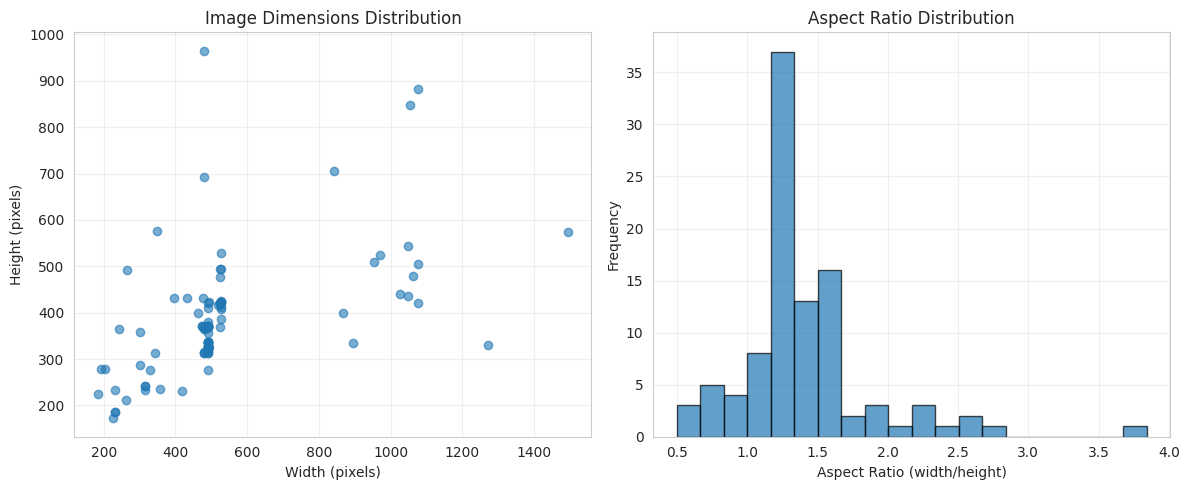

In [ ]:
# Plot image size distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(widths, heights, alpha=0.6)
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.title('Image Dimensions Distribution')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(image_aspects, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Aspect Ratio (width/height)')
plt.ylabel('Frequency')
plt.title('Aspect Ratio Distribution')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/WOA7015 Advanced Machine Learning/results/figures/image_properties.png', dpi=300, bbox_inches='tight')
plt.show()

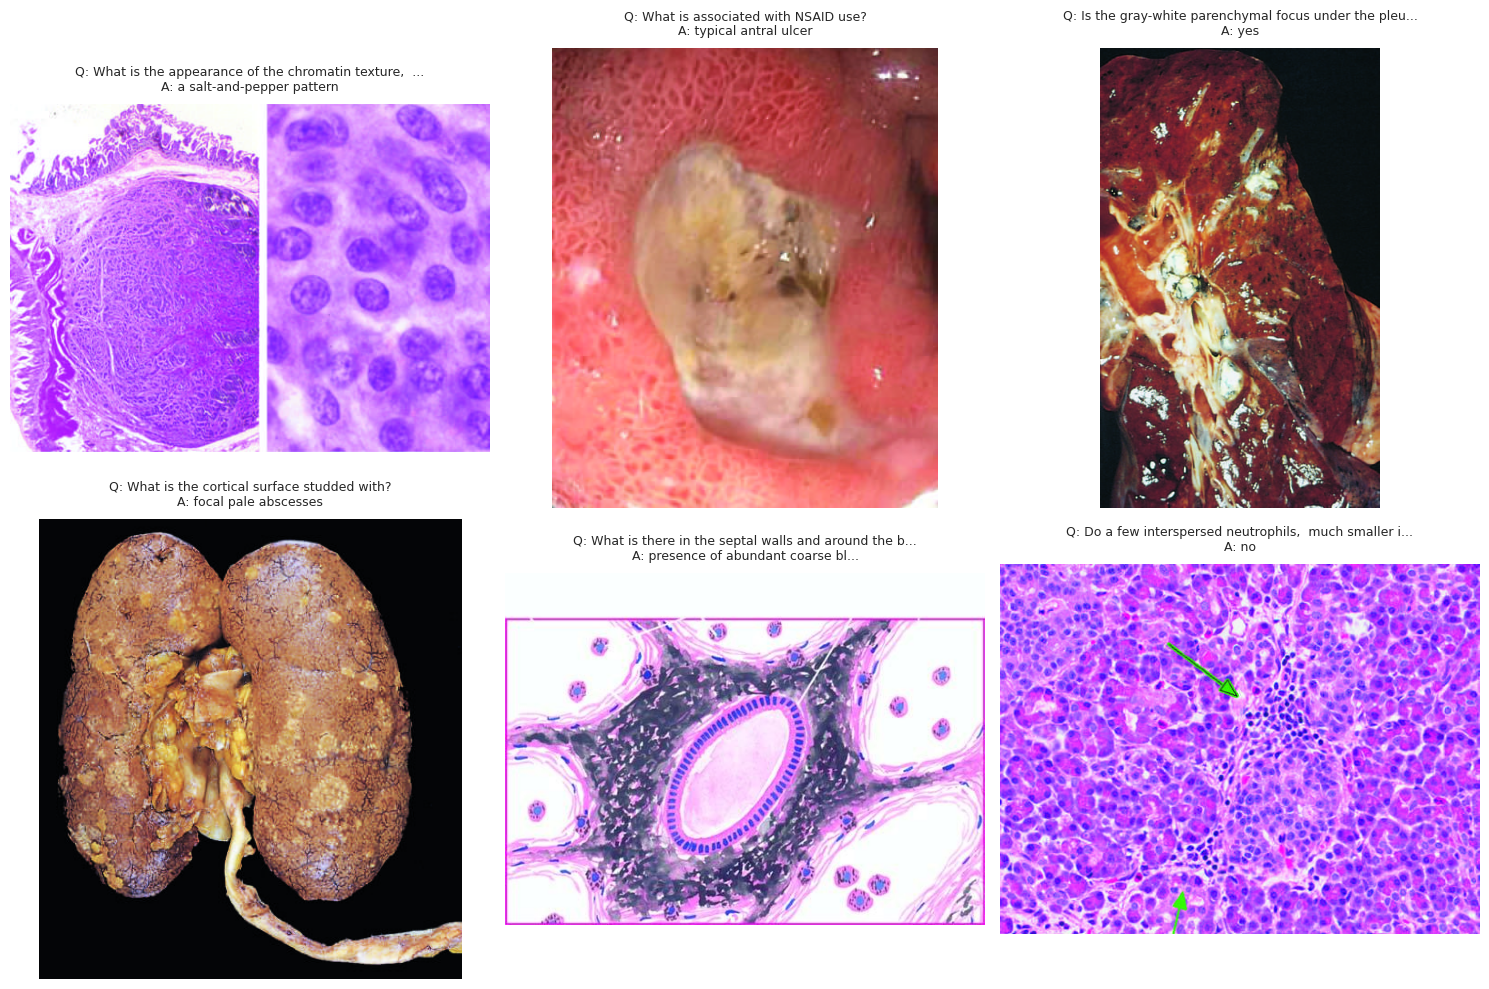

In [ ]:
# Display sample images with their Q&A
sample_imgs = train_df['image'].unique()[:6]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, img_name in enumerate(sample_imgs):
    # Load image
    img_path = os.path.join(image_dir, f"{img_name}.png" if not img_name.endswith('.png') else img_name)

    if os.path.exists(img_path):
        img = Image.open(img_path)
        axes[idx].imshow(img)
        axes[idx].axis('off')

        # Get one Q&A for this image
        qa = train_df[train_df['image'] == img_name].iloc[0]
        question = qa['question'][:50] + "..." if len(qa['question']) > 50 else qa['question']
        answer = qa['answer'][:30] + "..." if len(qa['answer']) > 30 else qa['answer']

        title = f"Q: {question}\nA: {answer}"
        axes[idx].set_title(title, fontsize=9, pad=10)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/WOA7015 Advanced Machine Learning/results/figures/sample_images.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Data Quality Checks

In [ ]:
# Check for duplicates
print("=== Duplicate Analysis ===")
print(f"\nDuplicate rows in training: {train_df.duplicated().sum()}")
print(f"Duplicate rows in test: {test_df.duplicated().sum()}")

# Check for same Q&A pairs
train_qa_pairs = train_df[['question', 'answer']].drop_duplicates()
test_qa_pairs = test_df[['question', 'answer']].drop_duplicates()

print(f"\nUnique Q&A pairs in training: {len(train_qa_pairs):,}")
print(f"Unique Q&A pairs in test: {len(test_qa_pairs):,}")

=== Duplicate Analysis ===

Duplicate rows in training: 101
Duplicate rows in test: 42

Unique Q&A pairs in training: 9,495
Unique Q&A pairs in test: 3,835


In [ ]:
# Check if all images exist
missing_images = []
sample_check = train_df['image'].unique()[:500]  # Check first 500

for img_name in sample_check:
    img_path = os.path.join(image_dir, f"{img_name}.png" if not img_name.endswith('.png') else img_name)
    if not os.path.exists(img_path):
        missing_images.append(img_name)

print(f"\n=== Image Availability (checked {len(sample_check)} images) ===")
print(f"Missing images: {len(missing_images)}")
if missing_images:
    print(f"Examples: {missing_images[:5]}")


=== Image Availability (checked 500 images) ===
Missing images: 0


In [ ]:
# Check answer vocabulary coverage
train_answers_set = set(train_df['answer'].unique())
vocab_set = set(answer_vocab)

answers_not_in_vocab = train_answers_set - vocab_set
vocab_not_in_answers = vocab_set - train_answers_set

print("=== Answer Vocabulary Coverage ===")
print(f"\nAnswers in training not in vocab: {len(answers_not_in_vocab)}")
print(f"Vocab entries not in training: {len(vocab_not_in_answers)}")
print(f"\nCoverage: {len(train_answers_set & vocab_set) / len(train_answers_set) * 100:.2f}%")

=== Answer Vocabulary Coverage ===

Answers in training not in vocab: 176
Vocab entries not in training: 1044

Coverage: 94.62%


## 7. Key Insights and Recommendations

In [ ]:
print("="*80)
print("KEY INSIGHTS FOR MODEL DEVELOPMENT")
print("="*80)

print("\n1. DATASET CHARACTERISTICS:")
print(f"   - Training: {len(train_df):,} Q&A pairs from {train_images:,} images")
print(f"   - Test: {len(test_df):,} Q&A pairs from {test_images:,} images")
print(f"   - Average {train_qa_per_image:.1f} Q&A pairs per image")

print("\n2. QUESTION TYPES:")
yes_no_pct = len(train_yes_no) / len(train_df) * 100
print(f"   - Closed-ended (yes/no): {yes_no_pct:.1f}%")
print(f"   - Open-ended: {100-yes_no_pct:.1f}%")
print(f"   - Avg question length: {train_df['question_length'].mean():.1f} words")

print("\n3. ANSWER CHARACTERISTICS:")
print(f"   - Unique answers: {train_unique_answers:,}")
print(f"   - Top {idx_50} answers cover 50% of data")
print(f"   - Top {idx_80} answers cover 80% of data")
print(f"   - Avg answer length: {train_df['answer_length'].mean():.1f} words")

print("\n4. RECOMMENDATIONS:")
print("   - Use data augmentation for images (rotation, flip, color jitter)")
print("   - Consider separate models/heads for closed vs open-ended questions")
print(f"   - Max sequence length for questions: {int(train_df['question_length'].quantile(0.95))} words (95th percentile)")
print(f"   - Max sequence length for answers: {int(train_df['answer_length'].quantile(0.95))} words (95th percentile)")
print("   - Split validation by images (not Q&A pairs) to avoid leakage")
print("   - Normalize images to 224x224 for CNN models")
print(f"   - Consider top {idx_80} answers for initial baseline (80% coverage)")

print("\n5. EVALUATION STRATEGY:")
print("   - Closed-ended: Accuracy, F1-score")
print("   - Open-ended: BLEU, ROUGE, Exact Match, Semantic Similarity")
print("   - Overall: Weighted metrics based on question type distribution")

print("\n" + "="*80)

KEY INSIGHTS FOR MODEL DEVELOPMENT

1. DATASET CHARACTERISTICS:
   - Training: 19,755 Q&A pairs from 2,599 images
   - Test: 6,761 Q&A pairs from 858 images
   - Average 7.6 Q&A pairs per image

2. QUESTION TYPES:
   - Closed-ended (yes/no): 49.6%
   - Open-ended: 50.4%
   - Avg question length: 6.4 words

3. ANSWER CHARACTERISTICS:
   - Unique answers: 3,273
   - Top 2 answers cover 50% of data
   - Top 187 answers cover 80% of data
   - Avg answer length: 1.8 words

4. RECOMMENDATIONS:
   - Use data augmentation for images (rotation, flip, color jitter)
   - Consider separate models/heads for closed vs open-ended questions
   - Max sequence length for questions: 16 words (95th percentile)
   - Max sequence length for answers: 6 words (95th percentile)
   - Split validation by images (not Q&A pairs) to avoid leakage
   - Normalize images to 224x224 for CNN models
   - Consider top 187 answers for initial baseline (80% coverage)

5. EVALUATION STRATEGY:
   - Closed-ended: Accuracy, F1-

## 8. Save Processed Statistics

In [ ]:
# Save key statistics for reference
stats = {
    'dataset': {
        'train_samples': len(train_df),
        'test_samples': len(test_df),
        'train_images': train_images,
        'test_images': test_images,
        'unique_answers': train_unique_answers
    },
    'questions': {
        'avg_length': float(train_df['question_length'].mean()),
        'max_length': int(train_df['question_length'].max()),
        'median_length': float(train_df['question_length'].median()),
        'recommended_max_length': int(train_df['question_length'].quantile(0.95))
    },
    'answers': {
        'avg_length': float(train_df['answer_length'].mean()),
        'max_length': int(train_df['answer_length'].max()),
        'yes_no_percentage': float(yes_no_pct),
        'recommended_max_length': int(train_df['answer_length'].quantile(0.95))
    },
    'question_types': train_qtype_counts.to_dict()
}

import json
with open('/content/drive/MyDrive/WOA7015 Advanced Machine Learning/results/dataset_statistics.json', 'w') as f:
    json.dump(stats, f, indent=2)

print("Statistics saved to: /content/drive/MyDrive/WOA7015 Advanced Machine Learning/results/dataset_statistics.json")

Statistics saved to: /content/drive/MyDrive/WOA7015 Advanced Machine Learning/results/dataset_statistics.json


In [ ]:
# Save train/val split for reproducibility
from sklearn.model_selection import train_test_split

# Split by images
unique_images = train_df['image'].unique()
train_imgs, val_imgs = train_test_split(unique_images, test_size=0.15, random_state=42)

train_split_df = train_df[train_df['image'].isin(train_imgs)]
val_split_df = train_df[train_df['image'].isin(val_imgs)]

# Save splits
train_split_df.to_csv('/content/drive/MyDrive/WOA7015 Advanced Machine Learning/train_split.csv', index=False)
val_split_df.to_csv('/content/drive/MyDrive/WOA7015 Advanced Machine Learning/val_split.csv', index=False)

print(f"\nTrain/Val split saved:")
print(f"  Train: {len(train_split_df):,} samples from {len(train_imgs):,} images")
print(f"  Val: {len(val_split_df):,} samples from {len(val_imgs):,} images")
print(f"\nFiles saved: train_split.csv, val_split.csv")


Train/Val split saved:
  Train: 16,876 samples from 2,209 images
  Val: 2,879 samples from 390 images

Files saved: train_split.csv, val_split.csv


## Summary

This notebook provided a comprehensive exploration of the PathVQA dataset:

1. **Dataset Overview**: Analyzed the size and structure of training and test sets
2. **Question Analysis**: Examined question types, lengths, and common patterns
3. **Answer Analysis**: Studied answer distribution and identified closed vs open-ended questions
4. **Image Analysis**: Investigated image properties and dimensions
5. **Data Quality**: Checked for duplicates, missing values, and data integrity
6. **Insights**: Generated actionable recommendations for model development
7. **Preprocessing**: Created train/val split for reproducible experiments

**Next Steps:**
- Implement baseline CNN + LSTM model
- Implement Vision-Language Model (BLIP/ViLT)
- Set up training and evaluation pipelines
- Compare model performance on closed vs open-ended questions